<h4>Define the initial data and the quantitative parameters of the model. (5 marks)</h4>

In [77]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import preprocessing

<h4>Import Dataset</h4>

In [83]:
#load data
df = pd.read_csv('crime-by-district-by-region.csv')


<h4>Reading Data</h4>

In [50]:
#show first five records of the dataset
df.head()

,REGIONS/DISTRICTS,TOTAL CASES,HOMICIDES,ECONOMIC CRIMES,SEX RELATED OFFENCES,CHILD RELATED OFFENCES,BREAKINGS,THEFTS,ROBBERIES,ASSAULTS,OTHER CRIMES,TERRORISM,POL/MEDIA,CORRUPTION,NARCOTICS,OTHER LAWS
0,C.I.D Headquarters,960,3,491,13,4,1,60,6,8,272,9,4,17,10,62
1,S.I.D,99,2,49,1,-,-,11,3,-,22,4,2,1,-,4
2,Aviation Police,318,1,47,7,-,5,81,2,40,98,NaN,-,1,18,19
3,C.I.D,1378,5,588,21,4,6,151,11,48,392,13,6,19,28,85
4,Jinja Road,1981,20,320,116,9,117,761,102,122,381,NaN,10,-,22,2


In [51]:
#show last five records of the dataset
df.tail()

,REGIONS/DISTRICTS,TOTAL CASES,HOMICIDES,ECONOMIC CRIMES,SEX RELATED OFFENCES,CHILD RELATED OFFENCES,BREAKINGS,THEFTS,ROBBERIES,ASSAULTS,OTHER CRIMES,TERRORISM,POL/MEDIA,CORRUPTION,NARCOTICS,OTHER LAWS
177,Jinja,3244,55,269,138,362,186,891,177,252,785,NaN,16,-,59,55
178,Buwenge,740,20,58,84,31,29,126,12,69,274,NaN,1,-,16,19
179,Kakira,724,27,21,46,48,35,130,38,163,198,NaN,-,-,6,10
180,KIIRA,4708,102,348,268,442,250,1148,228,484,1257,-,17,-,80,84
181,GRAND TOTAL,238746,4497,15099,17521,11589,14018,61533,7354,36323,64426,16,442,32,2890,3006


In [54]:
df.describe()

,HOMICIDES,ECONOMIC CRIMES,SEX RELATED OFFENCES,THEFTS,ROBBERIES
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,74.131868,248.835165,288.763736,1014.274725,121.120879
std,335.346731,1129.322363,1306.893370,4587.061867,552.300169
min,1.000000,3.000000,1.000000,8.000000,1.000000
25%,17.000000,36.000000,70.250000,217.750000,20.000000
50%,27.000000,86.000000,112.000000,399.500000,37.500000
75%,54.750000,181.750000,194.250000,723.250000,83.750000
max,4497.000000,15099.000000,17521.000000,61533.000000,7354.000000


<h4>Lets select some features that we want to use for regression</h4>

In [62]:
df = df[['REGIONS/DISTRICTS','HOMICIDES','ECONOMIC CRIMES','SEX RELATED OFFENCES','CHILD RELATED OFFENCES','BREAKINGS','THEFTS','ROBBERIES','ASSAULTS']]
df.head(10)

,REGIONS/DISTRICTS,HOMICIDES,ECONOMIC CRIMES,SEX RELATED OFFENCES,CHILD RELATED OFFENCES,BREAKINGS,THEFTS,ROBBERIES,ASSAULTS
0,C.I.D Headquarters,3,491,13,4,1,60,6,8
1,S.I.D,2,49,1,-,-,11,3,-
2,Aviation Police,1,47,7,-,5,81,2,40
3,C.I.D,5,588,21,4,6,151,11,48
4,Jinja Road,20,320,116,9,117,761,102,122
5,Kira Division,24,178,105,22,132,566,120,74
6,Kira Road,30,171,94,46,139,739,142,176
7,Mukono,36,283,176,41,221,927,112,277
8,Nagalama,19,54,76,10,73,275,31,78
9,KMP EAST,129,1007,567,127,682,3267,508,726


<H4>Lets plot Regions/districts with respect to Breakings :</H4>

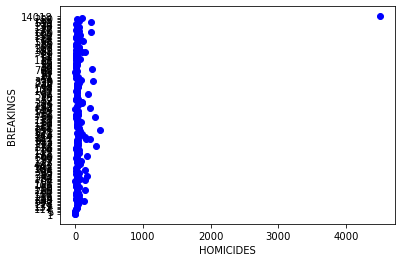

In [66]:
plt.scatter(df.HOMICIDES, df.BREAKINGS,  color='blue')
plt.xlabel("HOMICIDES")
plt.ylabel("BREAKINGS")
plt.show()

<H4>Creating train and test dataset</H4>
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set

In [67]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

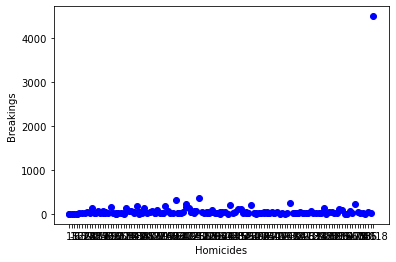

In [68]:
plt.scatter(train.BREAKINGS, train.HOMICIDES,  color='blue')
plt.xlabel("Homicides")
plt.ylabel("Breakings")
plt.show()